### Import Packages

In [1]:
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Load Data

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/dataset-orange-quality'

In [5]:
# menentukan path direktori data gambar pelatihan dan validasi di Google Drive
train_dir = '/content/drive/MyDrive/dataset-orange-quality/train'
val_dir = '/content/drive/MyDrive/dataset-orange-quality/validation'

In [6]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,Bad Orange,325
1,Good Orange,326


### Preparing Data

In [13]:
# Pra-pemrosesan data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 651 images belonging to 2 classes.


In [14]:
# Pra-pemrosesan data validation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Memuat data validation
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 250 images belonging to 2 classes.


### Modelling

In [15]:
# Membangun model sequential
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Layer konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Mengubah hasil konvolusi menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))

In [16]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

### Training and Evaluate Model

In [19]:
hist = model.fit(
    train_data,
    epochs = 25,
    validation_data = val_data,
    shuffle= True,
)

Epoch 1/25
21/21 [==============================] - 16s 770ms/step - loss: 0.6933 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
21/21 [==============================] - 17s 785ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/25
21/21 [==============================] - 16s 781ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/25
21/21 [==============================] - 17s 821ms/step - loss: 0.6932 - accuracy: 0.4823 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/25
21/21 [==============================] - 16s 773ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/25
21/21 [==============================] - 16s 737ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/25
21/21 [==============================] - 16s 761ms/step - loss: 0.6932 - accuracy: 0.4578 - val_loss: 0.6931 - val_accuracy: 0.5000

8/8 [==============================] - 4s 459ms/step - loss: 0.6931 - accuracy: 0.5000


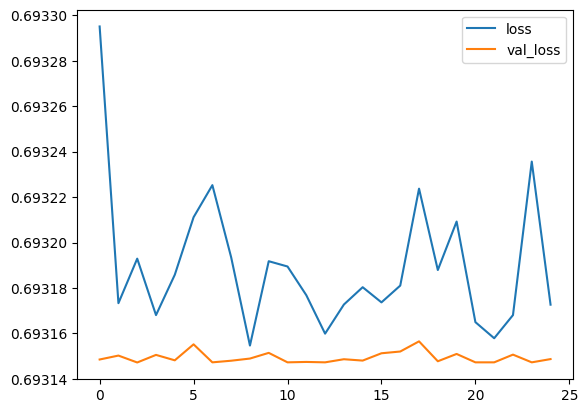

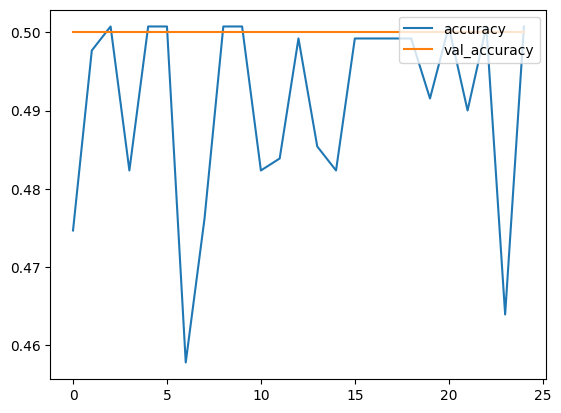

In [20]:
model.evaluate(val_data)

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

### Predicting

In [21]:
class_name = list(train_data.class_indices.keys())
class_name

['Bad Orange', 'Good Orange']

Saving image_220.jpg to image_220 (3).jpg
1/1 [==============================] - 0s 22ms/step
Predicted class: Good Orange


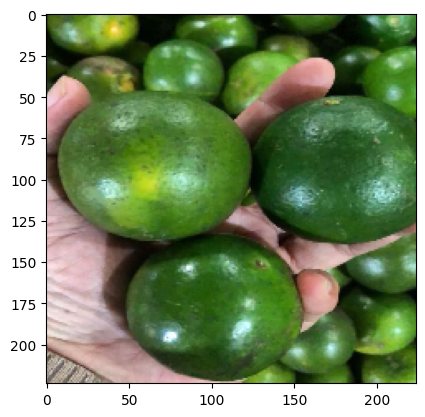

In [29]:
from keras.utils import load_img, img_to_array
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size = (224,224))
    imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 100)

    # Print prediction result
    predicted_class_index = np.argmax(classes)
    class_names = ['Bad Orange','Good Orange'] 
    predicted_class = class_names[predicted_class_index]

    print('Predicted class:', predicted_class)